Assignment 2 – Finite difference methods for options

Andrew McCann

In [1]:
%matplotlib notebook 

Question 1

In [2]:
import numpy as num
import math
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

E = 5
T = 1.5
r = 0.01
sigma = 0.5
sLow = math.exp(-8)
sHigh = math.exp(8)

xLow = math.log(sLow/E)
xHigh = math.log(sHigh/E)
Tau = (0.5)*(sigma**2)*(T)
k = r/(0.5*sigma**2)
alphaT = -0.5*(k-1)
betaT = -0.25*(k+1)**2

Nx = 500
dx = (xHigh-xLow)/float(Nx)
Nt = 500
dt = Tau/float(Nt)
alpha = dt/(float(dx)**2)

x=num.linspace(xLow,xHigh,Nx+1)
tau = num.linspace(0,Tau,Nt+1)
S = E*num.exp(x)
t = T-(2/sigma**2)*tau

B = (1+alpha)*num.eye(Nx-1,Nt-1)-alpha*0.5*num.diag(num.ones(Nx-2),1)-alpha*0.5*num.diag(num.ones(Nx-2),-1)
F = (1-alpha)*num.eye(Nx-1,Nt-1)+alpha*0.5*num.diag(num.ones(Nx-2),1)+alpha*0.5*num.diag(num.ones(Nx-2),-1)
Binv = linalg.inv(B)

U = num.zeros((Nx-1,Nt+1))

U[:,0] = num.maximum(num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0)

a = 0*num.ones(Nt+1);
b = num.exp((1-alphaT)*xHigh-betaT*tau)

r=num.zeros((Nx-1,Nt+1))
for i in range(0,Nt):
    r[0,i]=0.5*alpha*(a[i]+a[i+1])
for i in range(0,Nt):
    r[Nx-2,i]=0.5*alpha*(b[i]+b[i+1])

for i in range(0,Nt):
    U[:,i+1] = Binv.dot(F.dot(U[:,i]))+Binv.dot(r[:,i])
    
U=num.r_[[a],U,[b]]

V = num.zeros((Nx+1,Nt+1))

for i in range(0,Nx+1):
    for j in range(0,Nt+1):
        V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j]
 

<IPython.core.display.Javascript object>


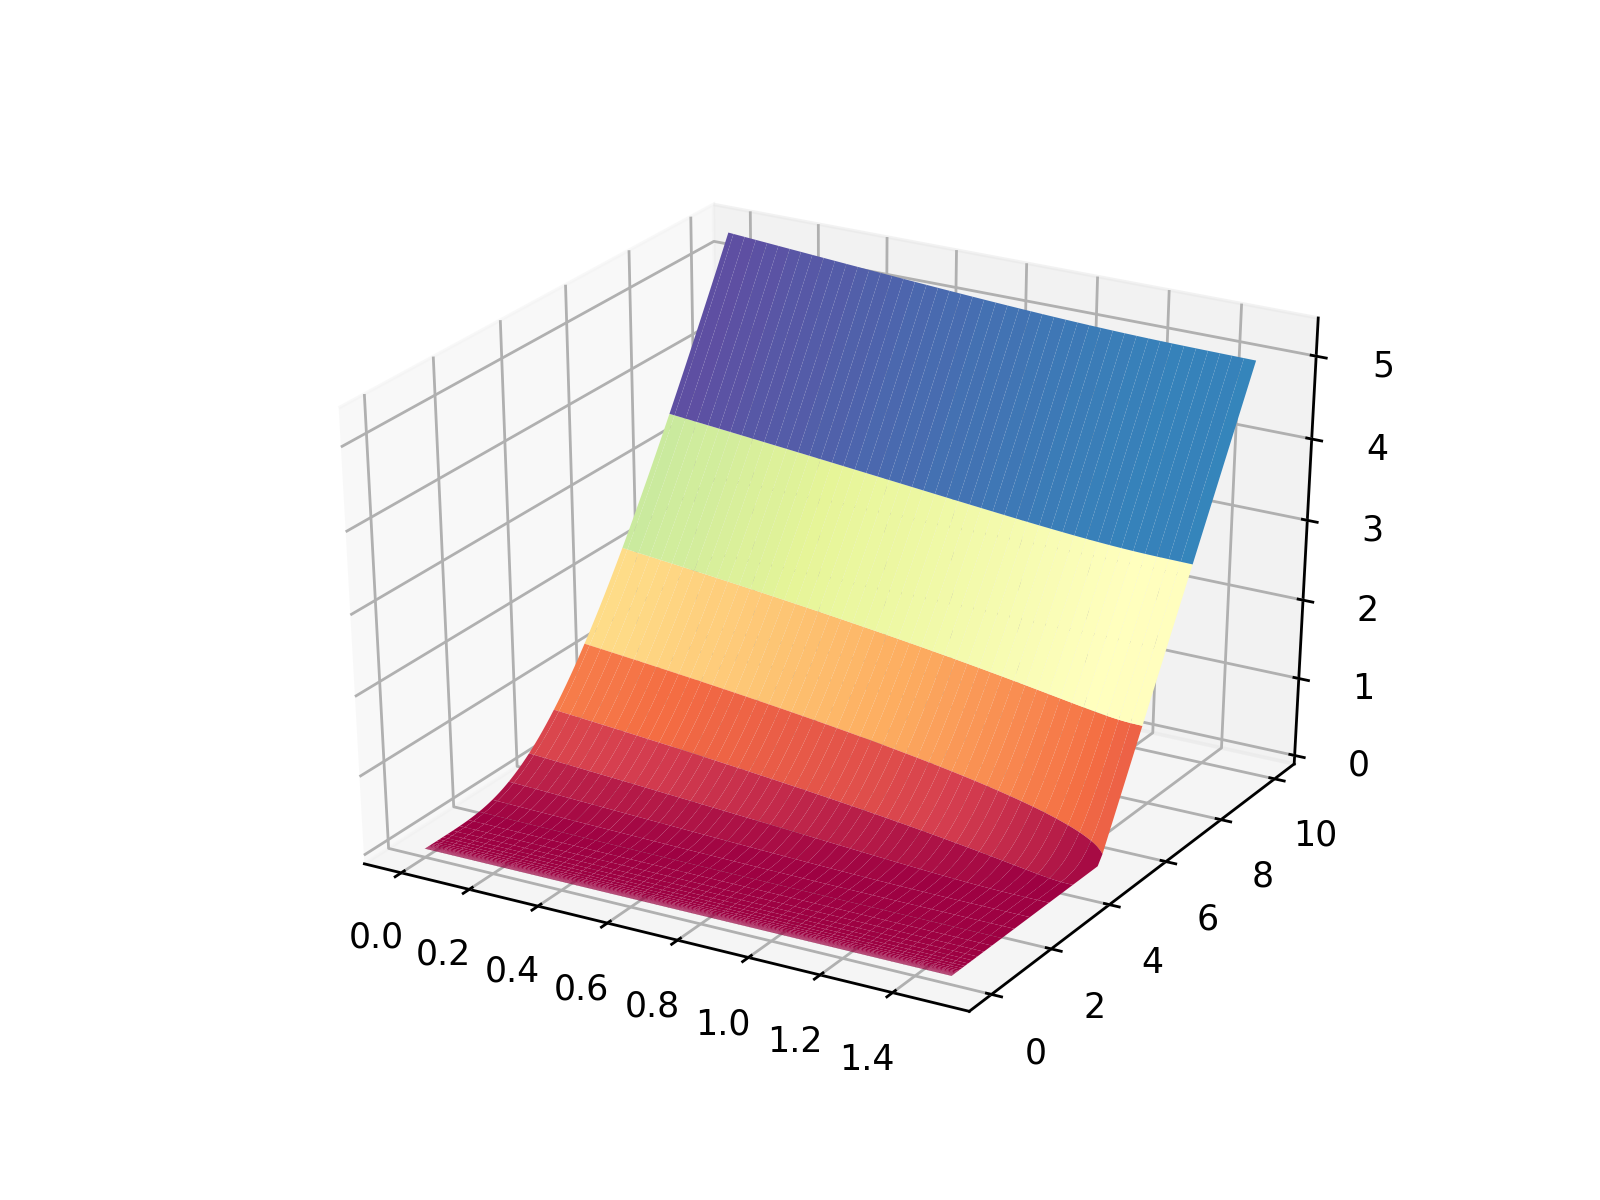

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx))

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral')
plt.show()

In [4]:
E = 5
T = 1.5
r = 0.01
sigma = 0.5
sLow = math.exp(-8)
sHigh = math.exp(8)

xLow = math.log(sLow/E)
xHigh = math.log(sHigh/E)
Tau = (0.5)*(sigma**2)*(T)
k = r/(0.5*sigma**2)
alphaT = -0.5*(k-1)
betaT = -0.25*(k+1)**2

Nx = 500
dx = (xHigh-xLow)/float(Nx)
Nt = 500
dt = Tau/float(Nt)
alpha = dt/(float(dx)**2)

x=num.linspace(xLow,xHigh,Nx+1)
tau = num.linspace(0,Tau,Nt+1)
S = E*num.exp(x)
t = T-(2/sigma**2)*tau

B = (1+alpha)*num.eye(Nx-1,Nt-1)-alpha*0.5*num.diag(num.ones(Nx-2),1)-alpha*0.5*num.diag(num.ones(Nx-2),-1)
F = (1-alpha)*num.eye(Nx-1,Nt-1)+alpha*0.5*num.diag(num.ones(Nx-2),1)+alpha*0.5*num.diag(num.ones(Nx-2),-1)
Binv = linalg.inv(B)

U = num.zeros((Nx-1,Nt+1))

U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0)
a = num.exp(-alphaT*xLow-(betaT+k)*tau)
b = 0*num.ones(Nt+1)

r=num.zeros((Nx-1,Nt+1))
for i in range(0,Nt):
    r[0,i]=0.5*alpha*(a[i]+a[i+1])
for i in range(0,Nt):
    r[Nx-2,i]=0.5*alpha*(b[i]+b[i+1])

for i in range(0,Nt):
    U[:,i+1] = Binv.dot(F.dot(U[:,i]))+Binv.dot(r[:,i])
    
U=num.r_[[a],U,[b]]

V = num.zeros((Nx+1,Nt+1))

for i in range(0,Nx+1):
    for j in range(0,Nt+1):
        V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j]
 

<IPython.core.display.Javascript object>


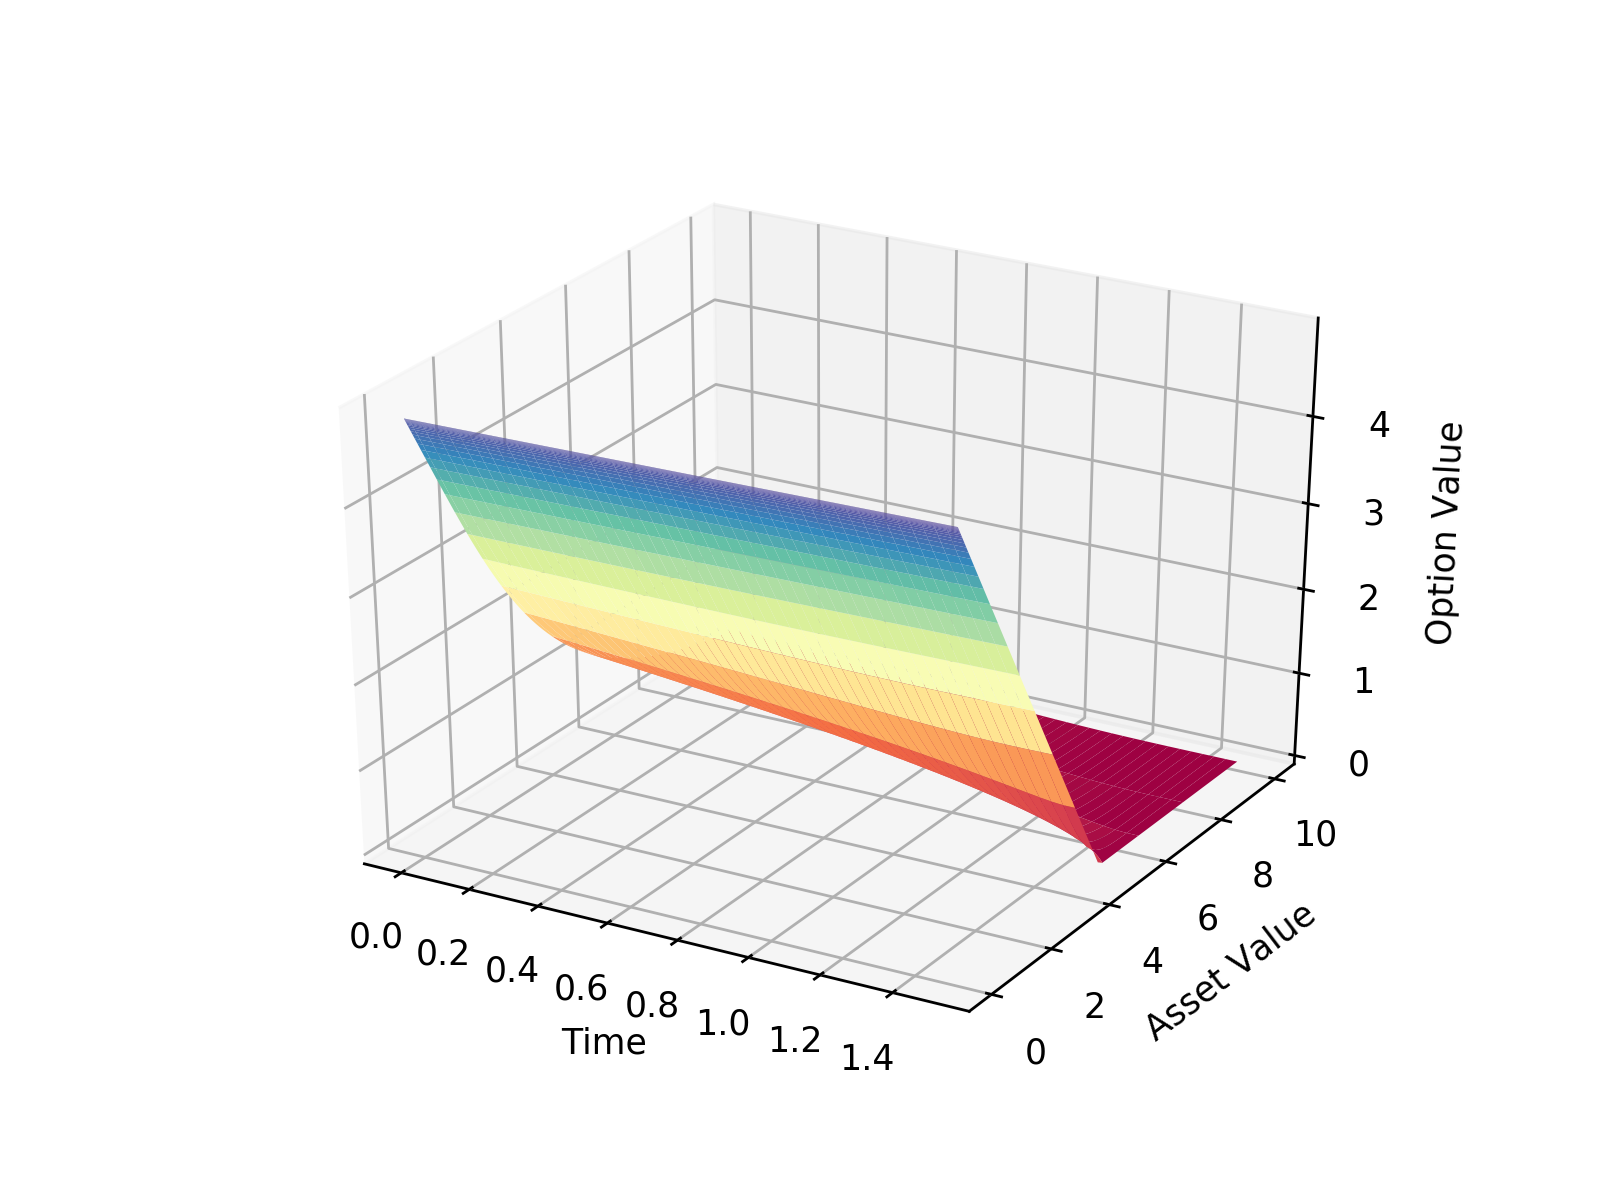

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx))

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral')
ax.set_zlabel('Option Value')
ax.set_ylabel('Asset Value')
ax.set_xlabel('Time')
plt.show()

Question 2

In [6]:
E = 5
T = 1.5
r = 0.01
sigma = 0.5
sLow = math.exp(-8)
sHigh = 10

xLow = math.log(sLow/E)
xHigh = math.log(sHigh/E)
Tau = (0.5)*(sigma**2)*(T)
k = r/(0.5*sigma**2)
alphaT = -0.5*(k-1)
betaT = -0.25*(k+1)**2

Nx = 500
dx = (xHigh-xLow)/float(Nx)
Nt = 500
dt = Tau/float(Nt)
alpha = dt/(float(dx)**2)

x=num.linspace(xLow,xHigh,Nx+1)
tau = num.linspace(0,Tau,Nt+1)
S = E*num.exp(x)
t = T-(2/sigma**2)*tau

B = (1+alpha)*num.eye(Nx-1,Nt-1)-alpha*0.5*num.diag(num.ones(Nx-2),1)-alpha*0.5*num.diag(num.ones(Nx-2),-1)
F = (1-alpha)*num.eye(Nx-1,Nt-1)+alpha*0.5*num.diag(num.ones(Nx-2),1)+alpha*0.5*num.diag(num.ones(Nx-2),-1)
Binv = linalg.inv(B)

U = num.zeros((Nx-1,Nt+1))

U[:,0] = num.maximum(num.exp(0.5*(k-1)*num.linspace(xLow+dx,xHigh-dx,Nx-1))-num.exp(0.5*(k+1)*num.linspace(xLow+dx,xHigh-dx,Nx-1)),0)
a = num.exp(-alphaT*xLow-(betaT+k)*tau)
b = 0*num.ones(Nt+1)

r=num.zeros((Nx-1,Nt+1));
for i in range(0,Nt):
    r[0,i]=0.5*alpha*(a[i]+a[i+1])
for i in range(0,Nt):
    r[Nx-2,i]=0.5*alpha*(b[i]+b[i+1])

for i in range(0,Nt):
    U[:,i+1] = Binv.dot(F.dot(U[:,i]))+Binv.dot(r[:,i])
    
U=num.r_[[a],U,[b]]

V = num.zeros((Nx+1,Nt+1))

for i in range(0,Nx+1):
    for j in range(0,Nt+1):
        V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j]
 
 

<IPython.core.display.Javascript object>


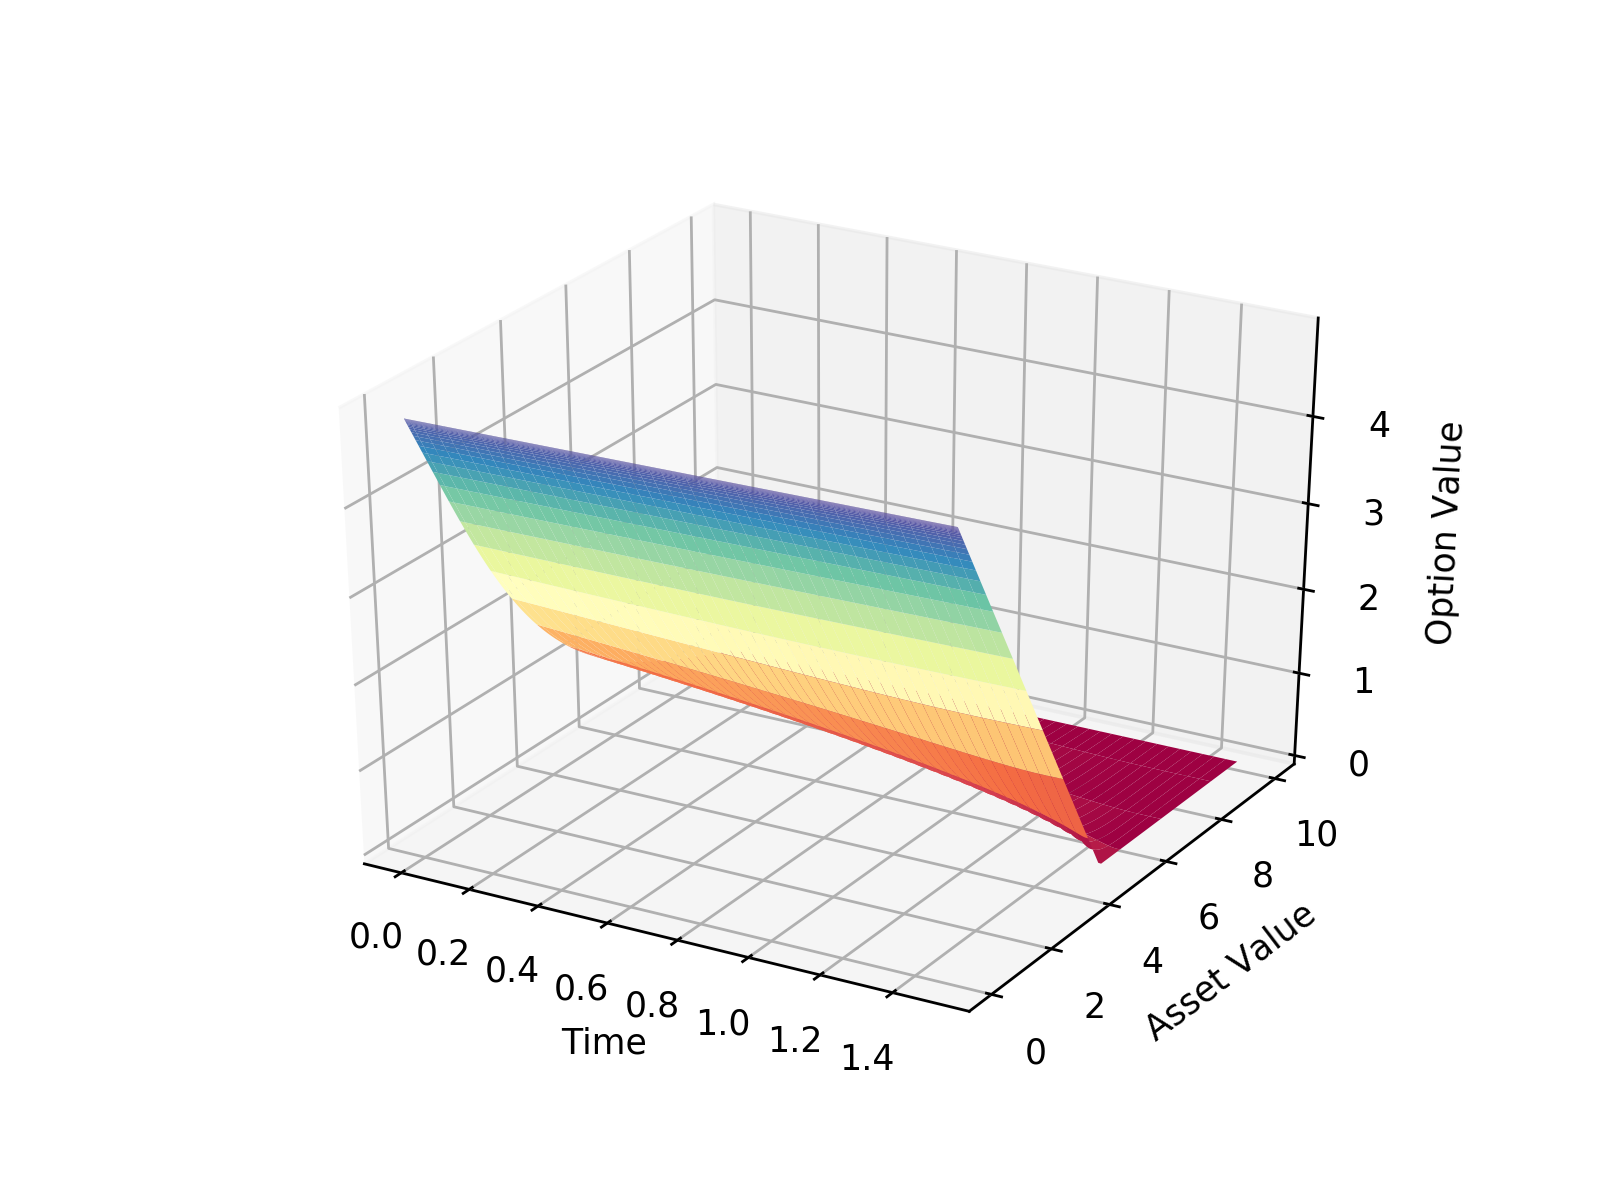

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X,Y = num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xHigh,Nx+1)))

ax.plot_surface(X,Y,V,cmap='Spectral')
ax.set_zlabel('Option Value')
ax.set_ylabel('Asset Value')
ax.set_xlabel('Time')
plt.show()

Explain the resulting output

The graphs for the zoomed in surface plot over a large range and the surface plot over the smaller range look identical. Both graphs converge to the hockey stick shape of a put call as we would expect. Neither one appears to converge faster than the other. 

By restricting the range of asset values to a smaller range, we are reducing the value of $\delta x$. The local accuracy of the scheme is understood in terms of order $\delta\tau$ and $\delta x$, thus decreasing $\delta x$ will decrease the rate of convergence of the local error to $0$. 
Restricting the range of $S$ in question 2, does not make the scheme more efficient or accurate.


Question 3

In [8]:
B = 20
E = 5
T = 1.5
r = 0.01
sigma = 0.5
sLow = math.exp(-8)
sHigh = math.exp(8)

xLow = math.log(sLow/E)
xHigh = math.log(sHigh/E)
Tau = (0.5)*(sigma**2)*(T)
k = r/(0.5*sigma**2)
alphaT = -0.5*(k-1)
betaT = -0.25*(k+1)**2

Nx = 500
dx = (xHigh-xLow)/float(Nx)
Nt = 500
dt = Tau/float(Nt)
alpha = dt/(float(dx)**2)

x=num.linspace(xLow,xHigh,Nx+1)
tau = num.linspace(0,Tau,Nt+1)
S = E*num.exp(x)
t = T-(2/sigma**2)*tau

B_matrix = (1+alpha)*num.eye(Nx-1,Nt-1)-alpha*0.5*num.diag(num.ones(Nx-2),1)-alpha*0.5*num.diag(num.ones(Nx-2),-1)
F = (1-alpha)*num.eye(Nx-1,Nt-1)+alpha*0.5*num.diag(num.ones(Nx-2),1)+alpha*0.5*num.diag(num.ones(Nx-2),-1)
Binv = linalg.inv(B_matrix)

U = num.zeros((Nx-1,Nt+1))

vals = num.linspace(xLow+dx, xHigh-dx, Nx-1)

for i in range(0,Nx-1):
    if(num.exp(vals[i])*E>E):
        U[i,0] = num.exp(0.5*(k-1)*vals[i])*(B/E)
    elif(num.exp(vals[i])*E==0):
        U[i,0] = num.exp(0.5*(k-1)*vals[i])*(B/(2*E))
    else:
        U[i,0] = 0

a = 0*num.ones(Nt+1)
b = B/E*num.exp(-alphaT*xHigh-betaT*tau)

r=num.zeros((Nx-1,Nt+1))
for i in range(0,Nt):
    r[0,i]=0.5*alpha*(a[i]+a[i+1])
for i in range(0,Nt):
    r[Nx-2,i]=0.5*alpha*(b[i]+b[i+1])

for i in range(0,Nt):
    U[:,i+1] = Binv.dot(F.dot(U[:,i]))+Binv.dot(r[:,i])
    
U=num.r_[[a],U,[b]]

V = num.zeros((Nx+1,Nt+1))

for i in range(0,Nx+1):
    for j in range(0,Nt+1):
        V[i,j]=E*num.exp(alphaT*x[i]+betaT*tau[j])*U[i,j]
 

<IPython.core.display.Javascript object>


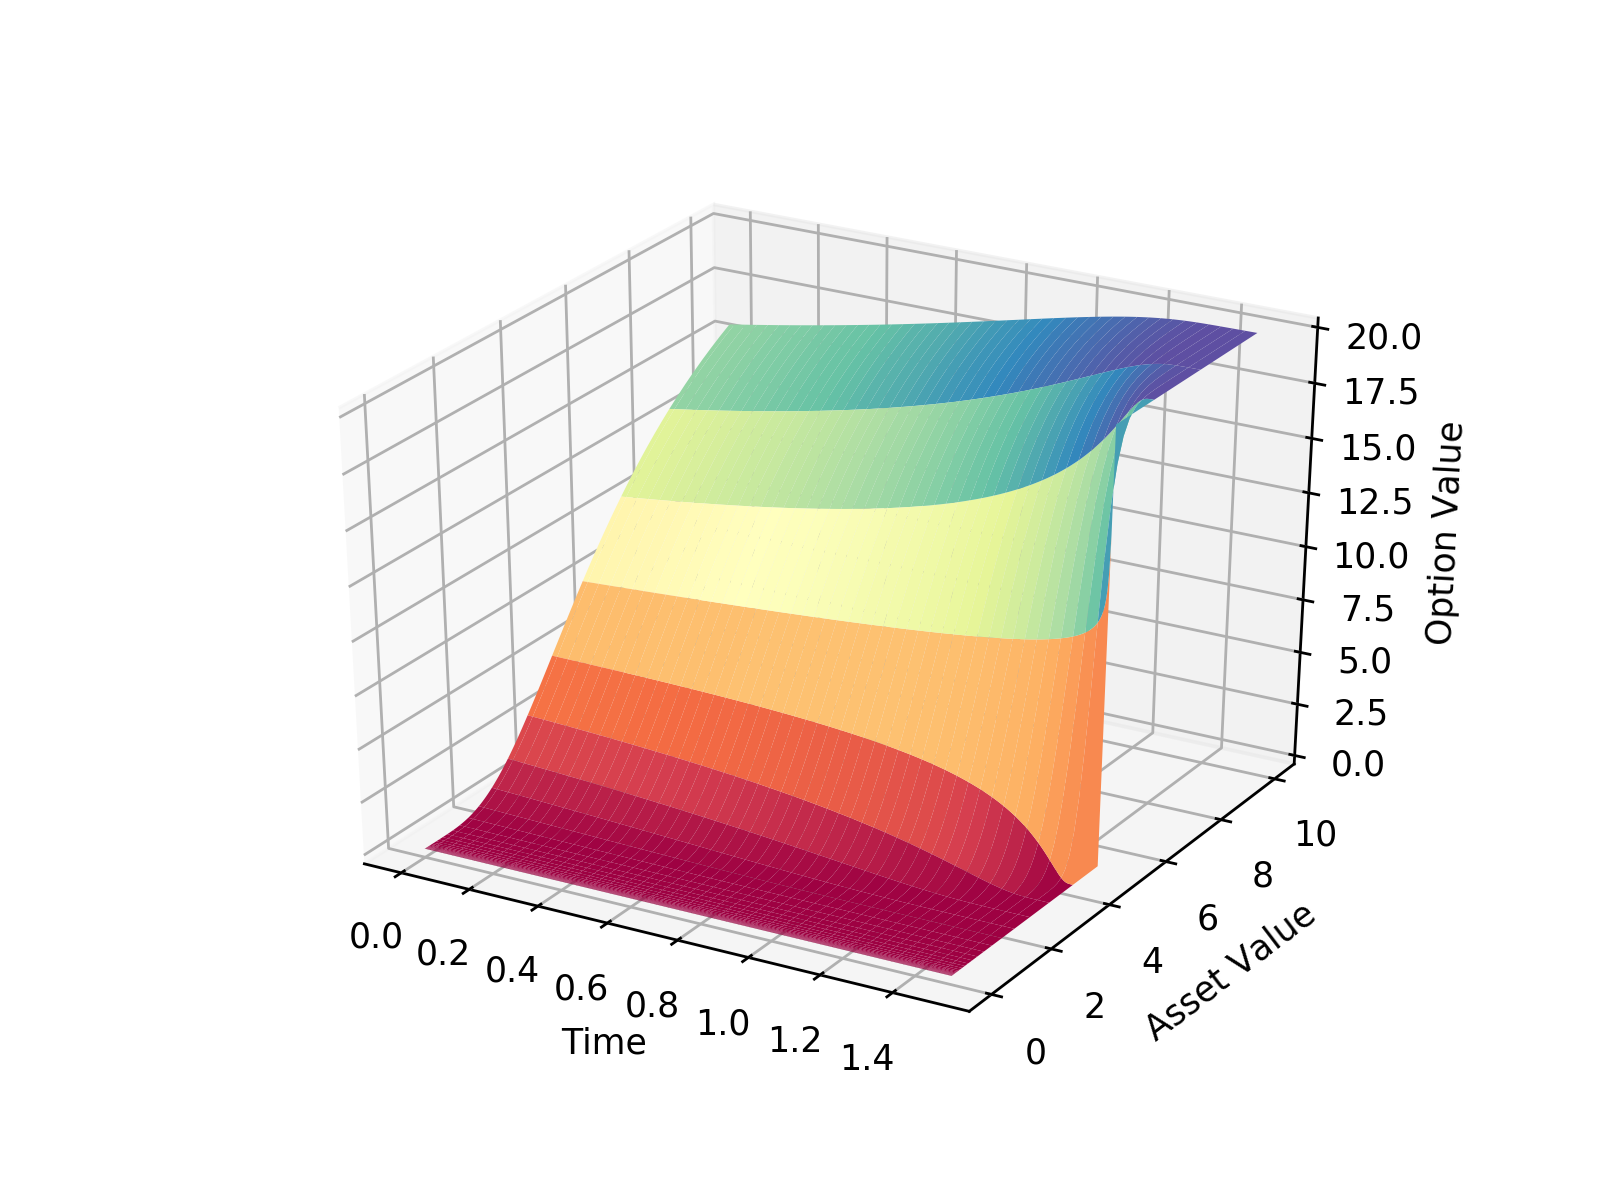

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xr=math.ceil((math.log(10/E)-xLow)/float(dx))

X,Y=num.meshgrid(num.linspace(T,0,Nt+1),E*num.exp(num.linspace(xLow,xr*dx+xLow,xr+1)))

ax.plot_surface(X,Y,V[range(0,xr+1),:],cmap='Spectral')
ax.set_zlabel('Option Value')
ax.set_ylabel('Asset Value')
ax.set_xlabel('Time')
plt.show()

Comments

Using the Crank-Nicolson method we were able to output the surface plot of cash or nothing call option. The graph looks similar to what we might expect. As time increases towards expiry we see the graph converges to the true value i.e. at expiry T=1.5 we see a step function which accurately displays the possible payoff of the option
